# 유성분검사성적서 전처리

In [1]:
import sys
from pathlib import Path
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import seaborn as sns

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR
from utils import plot_features

RAW_PRICE = 947
LOW_PRICE = 300

In [2]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False
# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

colors = ['#0A4EE4', '#AED6E0', '#9BC4D5', '#758A98', '#3E4E5F']


In [3]:
pandas_kwargs = {
    'memory_map': True,
    'parse_dates': ['검정일자', '출생일자', '최근분만일(연계)', '최근건유일(연계)', '최종수정일자(연계)', '가수제일자(연계)'],
    'date_format': '%Y%m%d',
    'dtype': {
        '개체번호': "Int64"
    }
}

milk: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '유성분검사성적서.csv', **pandas_kwargs)

/var/folders/zp/b80h2w41309d2z9qmnh381hw0000gn/T/ipykernel_46733/925919960.py:10: DtypeWarning: Columns (30,48) have mixed types. Specify dtype option on import or set low_memory=False.
  milk: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '유성분검사성적서.csv', **pandas_kwargs)


## 1차 중복 제거

In [4]:
display(milk.duplicated().sum())
milk.drop_duplicates(inplace=True)

np.int64(5516)

## 1차 Drop

In [5]:
# 결측치가 95% 이상인 열 삭제
nan_cols = ['착유일련번호', '혈통번호', '체점수(연계)', '유성분검사일련번호', '검정일시(ICT)', '단백율', '고형율', '유당']
milk.drop(columns=nan_cols, inplace=True)

# 유의미하지 않은 열 삭제 (nunique, 의미상 다른 열과 겹침)
no_use_cols = ['분만나이(연계)', '데이터입력코드', '개체명', '최고유량체세포', '농장관리번호', '유량']
no_use_cols += ['성년유량','성년유지량', '성년유단백량', '성년무지고형분량', '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MNU', '건유전마지막유량', '최종수정횟수(연계)', '가수제코드(연계)', '가수제일자(연계)']

milk.drop(columns=no_use_cols, inplace=True)

# 개체를 구분할 수 없는 행 삭제
milk.dropna(subset=['개체번호'], inplace=True)

# 기입이 이상한 농가 삭제
milk.drop(index=milk[milk['농장아이디'].isin([20278, 20402])].index, inplace=True)

milk

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,출생일자,산차,최근분만일(연계),최근건유일(연계),농후사료비(연계),농후사료급여량(연계),공태일수,최종수정일자(연계),최종수정정액코드(연계),분만후첫수정일까지일수
0,20249,20120709020022,2020-01-11,154,6.31,2.86,8.43,141,29.8,9714.0,...,2012-07-09,6,2019-08-10,2020-04-07,0.0,0.0,204,2020-03-01,250HO13267,186.0
1,20249,20120626020043,2020-01-11,457,0.00,0.00,0.00,0,0.0,14570.0,...,2012-06-26,4,2018-08-25,2019-11-25,0.0,0.0,269,2019-05-21,7HO13250,127.0
2,20249,20120504020095,2020-01-11,52,6.10,2.80,8.53,34,23.7,0.0,...,2012-05-04,5,2019-11-20,2021-01-04,0.0,0.0,175,2020-05-13,200HO06480,64.0
3,20249,20111008020210,2020-01-11,115,4.34,3.05,8.97,106,21.3,11008.0,...,2011-10-02,5,2019-09-18,2020-11-07,0.0,0.0,215,2020-04-20,14HO07770,50.0
4,20249,20121014020049,2020-01-11,290,5.56,3.70,9.23,220,21.7,11318.0,...,2012-10-14,5,2019-03-27,2020-05-14,0.0,0.0,224,2019-11-06,7HO13250,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100544,20251,20210227010196,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,2021-02-27,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN
100545,20251,20210310010197,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,2021-03-10,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN
100546,20251,20210530010201,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,2021-05-30,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN
100547,20251,20210609010202,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,2021-06-09,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN


## 이상치 수정

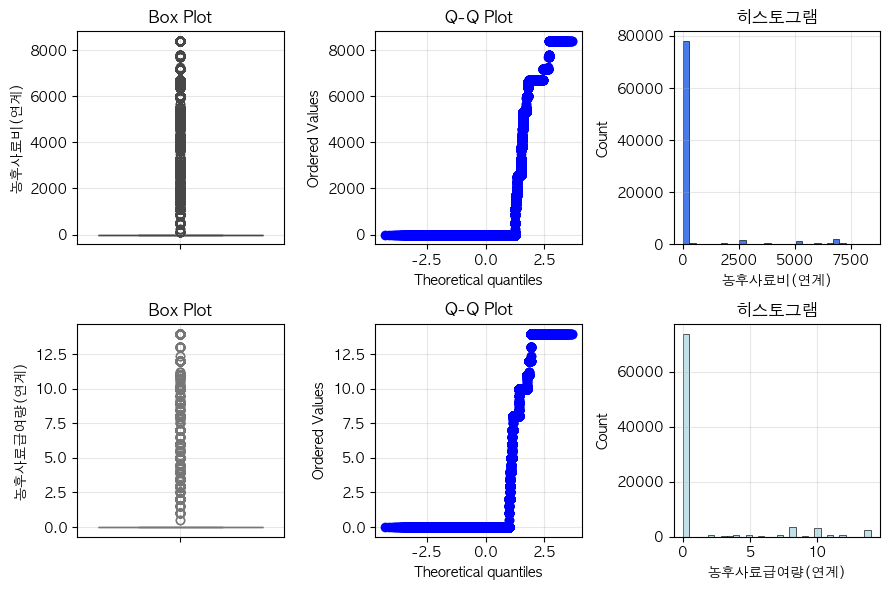

In [6]:
# 농후사료비는 가격 -> 마지막에 생산비 계산에 들어갈지도 모르니 일단은 남김 (피처로는 X)

milk.loc[milk['농후사료급여량(연계)'] == 50, '농후사료급여량(연계)'] = 5
milk.loc[milk['농후사료비(연계)'] == 27750, '농후사료비(연계)'] = 2275

plot_features(milk, ['농후사료비(연계)', '농후사료급여량(연계)'], colors=colors, bins=30)

## 날짜 관리

In [7]:
milk['수정시작일'] = milk['최근분만일(연계)'] + pd.to_timedelta((milk['분만후첫수정일까지일수']), unit='D')
milk['비유최고일'] = milk['최근분만일(연계)'] + pd.to_timedelta((milk['비유최고도달일수']), unit='D')

In [8]:
# 산차가 0인 경우 -> 최근분만일(연계)가 nan, 누적착유일(연계)가 0
cond = milk['최근분만일(연계)'].notna()
milk.loc[cond, '누적착유일(연계)'] = (milk.loc[cond, '검정일자'] - milk.loc[cond, '최근분만일(연계)']).dt.days.astype('Int64')
# 누적착유일이 존재하는데 최근분만일(연계)가 nan -> 채워넣기
cond = ~cond 
cond &= (milk['누적착유일(연계)'] != 0)
milk.loc[cond, '최근분만일(연계)'] = milk.loc[cond, '검정일자'] - pd.to_timedelta((milk.loc[cond, '누적착유일(연계)']), unit='D')

In [9]:
milk[milk['개체번호'] == 20180731010019]

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,최근분만일(연계),최근건유일(연계),농후사료비(연계),농후사료급여량(연계),공태일수,최종수정일자(연계),최종수정정액코드(연계),분만후첫수정일까지일수,수정시작일,비유최고일
42315,21679,20180731010019,2020-01-13,0,0.00,0.00,0.00,0,0.0,0.0,...,NaT,NaT,0.0,0.0,0,2019-09-07,1HO11863,NaN,NaT,NaT
42415,21679,20180731010019,2020-02-12,0,0.00,0.00,0.00,0,0.0,0.0,...,NaT,NaT,0.0,0.0,0,2019-09-07,1HO11863,NaN,NaT,NaT
42521,21679,20180731010019,2020-03-10,0,0.00,0.00,0.00,0,0.0,0.0,...,NaT,NaT,0.0,0.0,0,2019-09-07,1HO11863,NaN,NaT,NaT
42627,21679,20180731010019,2020-04-11,0,0.00,0.00,0.00,0,0.0,0.0,...,NaT,NaT,0.0,0.0,0,2019-09-07,1HO11863,NaN,NaT,NaT
42733,21679,20180731010019,2020-05-13,0,0.00,0.00,0.00,0,0.0,0.0,...,NaT,NaT,0.0,0.0,0,2019-09-07,1HO11863,NaN,NaT,NaT
42851,21679,20180731010019,2020-06-09,3,0.00,0.00,0.00,0,0.0,0.0,...,2020-06-06,2021-06-04,0.0,0.0,137,2020-10-21,7HO11314,60.0,2020-08-05,2020-10-15
42969,21679,20180731010019,2020-07-09,33,2.20,2.73,8.32,71,8.7,0.0,...,2020-06-06,2021-06-04,0.0,0.0,137,2020-10-21,7HO11314,60.0,2020-08-05,2020-10-15
43100,21679,20180731010019,2020-08-25,80,0.00,0.00,0.00,0,0.0,0.0,...,2020-06-06,2021-06-04,0.0,0.0,137,2020-10-21,7HO11314,60.0,2020-08-05,2020-10-15
43231,21679,20180731010019,2020-09-17,103,0.00,0.00,0.00,0,11.4,0.0,...,2020-06-06,2021-06-04,0.0,0.0,137,2020-10-21,7HO11314,60.0,2020-08-05,2020-10-15
43368,21679,20180731010019,2020-10-15,131,2.57,3.27,8.80,14,7.8,8698.0,...,2020-06-06,2021-06-04,0.0,0.0,137,2020-10-21,7HO11314,60.0,2020-08-05,2020-10-15


In [10]:
mode_by_san = (
    milk.groupby(['농장아이디', '개체번호', '산차'])['최근분만일(연계)'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
)

milk['최근분만일(연계)'] = milk['최근분만일(연계)'].fillna(mode_by_san)

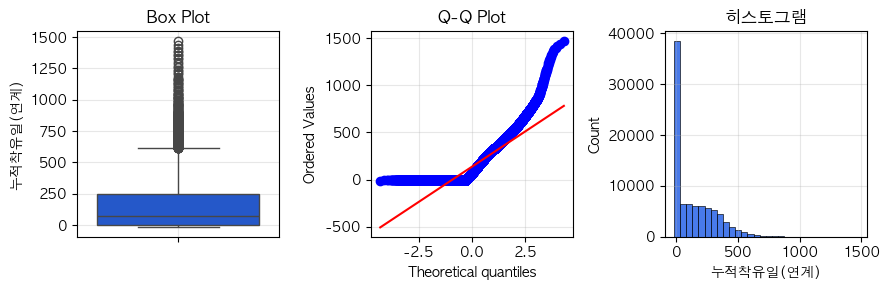

In [11]:
plot_features(milk, features=['누적착유일(연계)'], colors=colors[:1], bins=30)

In [12]:
milk[milk['누적착유일(연계)'] > 1000]

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,최근분만일(연계),최근건유일(연계),농후사료비(연계),농후사료급여량(연계),공태일수,최종수정일자(연계),최종수정정액코드(연계),분만후첫수정일까지일수,수정시작일,비유최고일
1829,20250,20140325020109,2020-01-10,1013,3.73,3.33,9.14,30,14.0,13121.0,...,2017-04-02,2020-04-07,0.0,0.0,880,2019-08-30,29HO18123,81.0,2017-06-22,2017-07-28
1908,20250,20140325020109,2020-02-16,1050,4.24,3.77,9.72,53,13.5,13121.0,...,2017-04-02,2020-04-07,0.0,0.0,880,2019-08-30,29HO18123,81.0,2017-06-22,2017-07-28
1987,20250,20140325020109,2020-03-12,1075,0.00,0.00,0.00,0,0.0,13121.0,...,2017-04-02,2020-04-07,0.0,0.0,880,2019-08-30,29HO18123,81.0,2017-06-22,2017-07-28
2066,20250,20140325020109,2020-04-09,1103,0.00,0.00,0.00,0,0.0,13121.0,...,2017-04-02,2020-04-07,0.0,0.0,880,2019-08-30,29HO18123,81.0,2017-06-22,2017-07-28
2145,20250,20140325020109,2020-05-08,1132,0.00,0.00,0.00,0,0.0,13121.0,...,2017-04-02,2020-04-07,0.0,0.0,880,2019-08-30,29HO18123,81.0,2017-06-22,2017-07-28
2237,20250,20140325020109,2020-06-09,1164,0.00,0.00,0.00,0,0.0,13121.0,...,2017-04-02,2020-04-07,0.0,0.0,880,2019-08-30,29HO18123,81.0,2017-06-22,2017-07-28
12121,20269,20100831010002,2020-11-21,1030,0.00,0.00,0.00,0,0.0,13541.0,...,2018-01-26,2019-07-22,0.0,0.0,0,2018-12-12,208HO10312,321.0,2018-12-13,2018-04-21
12257,20269,20100831010002,2020-12-23,1062,0.00,0.00,0.00,0,0.0,13541.0,...,2018-01-26,2019-07-22,0.0,0.0,0,2018-12-12,208HO10312,321.0,2018-12-13,2018-04-21
20509,20446,20130621010034,2020-03-19,1016,0.00,0.00,0.00,0,0.0,10169.0,...,2017-06-07,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,2017-12-24,2017-09-20
20569,20446,20130621010034,2020-04-15,1043,0.00,0.00,0.00,0,0.0,10169.0,...,2017-06-07,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,2017-12-24,2017-09-20


## 파생변수 생성

### 비유단계 파생변수

In [13]:
def level_map(row: pd.Series):
    test = row['검정일자']
    
    if test < row['수정시작일']:
        return 1 # '공태기'
    elif test < row['최종수정일자(연계)']:
        return 2 # '수정'
    elif test < row['최근건유일(연계)']:
        return 3 #'임신비유기'
    else:
        return 4 # '연장비유'
        

milk['비유단계'] = milk.apply(level_map, axis=1)

### 건유기간 파생변수

In [14]:
# def calculate_rest(row: pd.Series):
#     if row['산차'] == 1:
#         return 0
#     if row[['최근분만일(연계)', '최근건유일(연계)']].isnull().sum() != 0:
#         return np.nan
#     else:
#         return (row['최근분만일(연계)'] - row['최근건유일(연계)']).days

# milk.groupby(['농장아이디', '개체번호', '산차']).apply(lambda x: x['최근분만일(연계)'] - x['최근건유일(연계)'].shift(1))

In [15]:
# milk['건유기간'].value_counts(dropna=False)

In [ ]:
# 젖을 짜지 않는 건유기 or 송아지 삭제
milk.drop(index=milk[milk['유단백'] == 0].index, inplace=True)

In [17]:
milk['비유단계'].value_counts()

비유단계
3    13331
4    11169
2     8160
1     7604
Name: count, dtype: int64

### 계절 파생변수

In [18]:
milk['계절'] = milk['검정일자'].dt.month.apply(
    lambda x: 1 if x in [3, 4, 5] else 2 if x in [6, 7, 8]
        else 3 if x in [9, 10, 11] else 4
)

### 농장구분

In [19]:
pandas_kwargs = {
    'memory_map': True,
    'date_format': '%Y%m%d.0'
}

robot_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '로봇착유기.csv', **pandas_kwargs)
ict_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / 'ICT착유기.csv', **pandas_kwargs)
robot_data

,농장아이디,개체번호,축산업등록번호,축종코드,제조사 아이디,장비코드,장비번호,측정일시,착유량,착유시작일시,...,색상,온도,유지방,유단백,공기흐름,수집구분,수집일자,수집건수,산차,반추시간
0,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-20 00:00:00.0,24,2020-01-20 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200120,1,6.0,414.0
1,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-21 00:00:00.0,28,2020-01-21 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200121,1,6.0,507.0
2,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-22 00:00:00.0,37,2020-01-22 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200122,1,6.0,516.0
3,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-23 00:00:00.0,43,2020-01-23 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200123,1,6.0,508.0
4,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-24 00:00:00.0,43,2020-01-24 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200124,1,6.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732655,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-08 12:46:46.0,9,2022-11-08 12:46:46.0,...,NaN,39.4,4.6,3.4,3.3,NaN,20221109,1,1.0,NaN
732656,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-09 01:26:34.0,9,2022-11-09 01:26:34.0,...,NaN,38.6,4.2,3.4,2.9,NaN,20221110,1,1.0,NaN
732657,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-09 09:41:34.0,6,2022-11-09 09:41:34.0,...,NaN,38.3,4.5,3.4,2.1,NaN,20221110,1,1.0,NaN
732658,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-09 21:26:42.0,9,2022-11-09 21:26:42.0,...,NaN,39.7,4.4,3.4,3.2,NaN,20221110,1,1.0,NaN


In [20]:
robot_farm = list(set(robot_data['농장아이디'].tolist()) & set(milk['농장아이디'].tolist()))
ict_farm = list(set(ict_data['농장아이디'].tolist()) & set(milk['농장아이디'].tolist()))

smart_farm = robot_farm + ict_farm
smart_farm

[20264,
 20265,
 21148,
 21133,
 21678,
 21134,
 21135,
 21686,
 20249,
 20250,
 20251,
 20446]

In [21]:
milk['농장구분'] = milk['농장아이디'].apply(lambda x: 1 if x in smart_farm else 0)

In [22]:
milk['농장구분'].value_counts()

농장구분
0    29470
1    10794
Name: count, dtype: int64

### 정액코드

In [23]:
milk.columns

Index(['농장아이디', '개체번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백', '무지고형분', '체세포수',
       '우유내요소태질소', '305일유량', '305일유지량', '305일유단백', '305일무지고형분', '전산차비유지속성',
       '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량', '전산차건유전유량', '출생일자', '산차',
       '최근분만일(연계)', '최근건유일(연계)', '농후사료비(연계)', '농후사료급여량(연계)', '공태일수',
       '최종수정일자(연계)', '최종수정정액코드(연계)', '분만후첫수정일까지일수', '수정시작일', '비유최고일', '비유단계',
       '계절', '농장구분'],
      dtype='object')

In [24]:
import pandas as pd
import numpy as np

pattern = r'^(\d+HO)|^(\d+JE)'

def extract_prefix(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    m = pd.Series([x]).str.extract(pattern, expand=True)
    # m는 두 개 컬럼(그룹)이라 한쪽만 채워질 수 있음
    val = m.iloc[0].dropna()
    if len(val) == 0:
        return '비정형'
    return val.iloc[0]

milk['정액코드분류'] = milk['최종수정정액코드(연계)'].apply(extract_prefix)
milk['정액코드분류'].value_counts()

정액코드분류
200HO    7784
208HO    6960
7HO      6082
250HO    4459
29HO     2535
151HO    2424
14HO     2261
11HO     1968
551HO     835
1HO       590
734HO     375
203HO     338
비정형       275
515HO     221
534HO     125
76HO      122
94HO       95
513HO      85
147HO      27
71HO       19
3HO         7
11JE        5
Name: count, dtype: int64

In [25]:
milk[milk['개체번호'] == 20170901010044][['농장아이디', '검정일자', '최종수정일자(연계)', '최종수정정액코드(연계)']]

,농장아이디,검정일자,최종수정일자(연계),최종수정정액코드(연계)
27664,21141,2020-01-14,2020-06-08,7HO13250
27762,21141,2020-02-13,2020-06-08,7HO13250
28067,21141,2020-05-14,2020-06-08,7HO13250
28176,21141,2020-06-15,2020-06-08,7HO13250
28287,21141,2020-07-15,2020-06-08,7HO13250
28401,21141,2020-08-12,2020-06-08,7HO13250
28523,21141,2020-09-17,2020-06-08,7HO13250
28649,21141,2020-10-17,2020-06-08,7HO13250
28776,21141,2020-11-15,2020-06-08,7HO13250
28902,21141,2020-12-22,2020-06-08,7HO13250


### 가격 파생변수

In [26]:
fat_price_table = pd.DataFrame({
    '유지방율': [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1],
    '가격': [-103.00, -41.20, -30.90, -20.60, -10.30, 0.00, 10.30, 20.60, 30.90, 41.20, 51.50, 56.65]
})

def calculate_price(row: pd.Series):
    price = RAW_PRICE
    yudan = round(row['유단백'], 1)
    yuji = round(row['유지방율'], 1)
    shapo = row['체세포수']
    
    if row[['유단백', '유지방율', '체세포수']].isnull().sum() != 0:
        return np.nan
    
    if yuji <= 3.0:
        price += -103.0
    elif yuji >= 4.1:
        price += 56.65
    else:
        price += np.interp(yuji, fat_price_table['유지방율'], fat_price_table['가격'])
    
    if yudan < 3.0:
        pass
    elif yudan == 3.0:
        price += 4.0
    elif yudan == 3.1:
        price += 11.65
    else:
        price += 19.41
    
    if shapo < 200:
        price += 52.69
    elif shapo < 350:
        price += 39.25
    else:
        price = LOW_PRICE
    
    return round(price, 2)

In [27]:
milk['가격'] = milk.apply(calculate_price, axis=1)
milk['가격'].value_counts(dropna=False)

가격
1075.75    13420
300.00      4308
1062.31     1897
1056.34     1537
1067.99     1416
           ...  
977.30        10
1041.75       10
959.35        10
979.95         9
956.70         2
Name: count, Length: 97, dtype: int64

In [28]:
milk['가격미달'] = (milk['가격'] == 300).astype(int)

In [29]:
milk['가격미달'] = milk['가격'].apply(lambda x: 1 if x == LOW_PRICE else 0)

milk['가격미달'].value_counts()

가격미달
0    35956
1     4308
Name: count, dtype: int64

In [30]:
milk['가격구분'] = milk['가격'].apply(lambda x: 0 if x == milk['가격'].max() else 2 if x == LOW_PRICE else 1)

milk['가격구분'].value_counts()

가격구분
1    22536
0    13420
2     4308
Name: count, dtype: int64

35956 40264


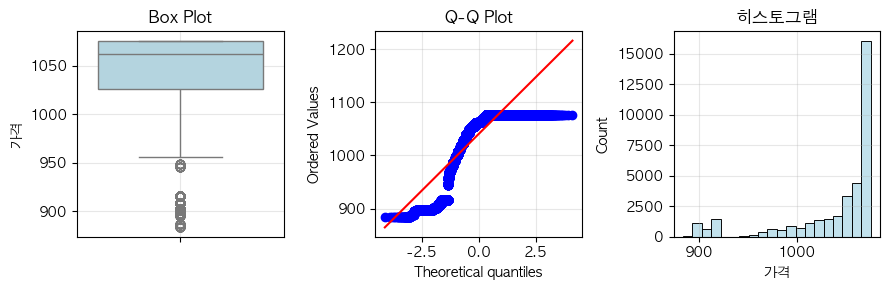

In [31]:
temp = milk[milk['가격'] > 300]
print(temp.shape[0], milk.shape[0])
plot_features(temp, ['가격'], colors=['lightblue'], bins=20)

### 분만간격, 분만월령 파생변수

In [32]:
# NaN이 아닌 값들에 대해서만 계산
milk['분만간격'] = milk.groupby(['농장아이디', '개체번호'])['최근분만일(연계)'].transform(
    lambda x: x.dt.days if pd.api.types.is_timedelta64_dtype(x) 
    else x.dropna().diff().dt.days
)

# 같은 날짜가 연속될 때 (차이 0)를 NaN으로 변경
milk.loc[milk['분만간격'] == 0, '분만간격'] = np.nan
# 그룹 내에서 NaN을 앞의 값으로 채우기
milk['분만간격'] = milk.groupby(['농장아이디', '개체번호'])['분만간격'].ffill()

In [33]:
milk['분만간격'].value_counts(dropna=False, normalize=True).mul(100).round(1)

분만간격
NaN      59.8
343.0     0.4
364.0     0.4
324.0     0.4
404.0     0.4
         ... 
861.0     0.0
605.0     0.0
527.0     0.0
685.0     0.0
808.0     0.0
Name: proportion, Length: 420, dtype: float64

In [34]:
milk['분만월령'] = (milk['최근분만일(연계)'].dt.to_period('M') - milk['출생일자'].dt.to_period('M')).apply(lambda x: x.n if pd.notna(x) else np.nan)
milk['분만월령']

0         85
2         90
3         95
4         77
5         75
          ..
100502    23
100503    25
100505    24
100506    24
100508    25
Name: 분만월령, Length: 40264, dtype: int64

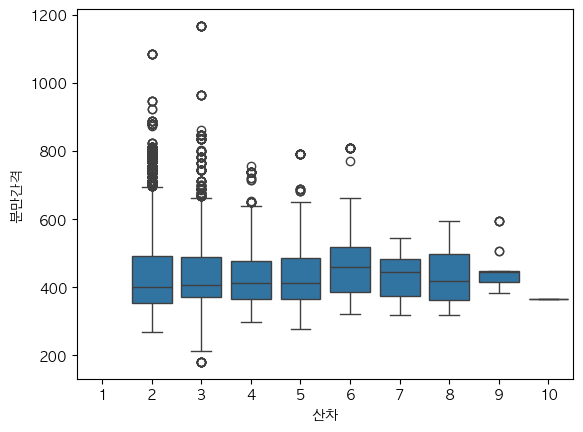

In [35]:
sns.boxplot(milk, x='산차', y='분만간격')
plt.show()

## 전산차비유지속성 전처리

In [ ]:
# 농장아이디, 개체번호마다
# 2번째 산차부터 -> rank > 1
# 0인 전산차비유지속성 -> np.nan
# 전산차가 존재하는데 비유지속성 기록이 안된 것으로 보이는 0값들을 nan으로 처리

milk['산차랭크'] = milk.groupby(['농장아이디', '개체번호'])['산차'].rank('dense')

cond = milk['산차랭크'] > 1
cond = milk['전산차비유지속성'] == 0
milk.loc[cond, '전산차비유지속성'] = np.nan

milk['전산차비유지속성'].value_counts(normalize=True, dropna=False).mul(100).round(1)

전산차비유지속성
NaN      56.2
82.6      0.3
100.0     0.2
80.0      0.2
88.2      0.2
         ... 
115.2     0.0
31.4      0.0
58.2      0.0
94.9      0.0
99.4      0.0
Name: proportion, Length: 777, dtype: float64

## 누수 없이 설정하기

In [37]:
milk.columns

Index(['농장아이디', '개체번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백', '무지고형분', '체세포수',
       '우유내요소태질소', '305일유량', '305일유지량', '305일유단백', '305일무지고형분', '전산차비유지속성',
       '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량', '전산차건유전유량', '출생일자', '산차',
       '최근분만일(연계)', '최근건유일(연계)', '농후사료비(연계)', '농후사료급여량(연계)', '공태일수',
       '최종수정일자(연계)', '최종수정정액코드(연계)', '분만후첫수정일까지일수', '수정시작일', '비유최고일', '비유단계',
       '계절', '농장구분', '정액코드분류', '가격', '가격미달', '가격구분', '분만간격', '분만월령', '산차랭크'],
      dtype='object')

In [38]:
dropped = milk.copy()

In [39]:
# 누수 있는 행을 nan으로 (공태일수, 최종수정일자)
cond = dropped['검정일자'] < dropped['최종수정일자(연계)']
dropped.loc[cond, ['공태일수', '정액코드분류']] = np.nan

# 날짜 제거
date_cols = ['출생일자', '최근분만일(연계)', '최근건유일(연계)', '최종수정일자(연계)', '수정시작일', '비유최고일']
dropped.drop(columns=date_cols, inplace=True)

# 자체로 데이터 누수인 컬럼 제거
drop_cols = ['현재산차비유지속성', '비유최고도달일수', '비유후기최고유량']
dropped.drop(columns=drop_cols, inplace=True)

# 대체된 컬럼 제거
replace_cols = ['유단백', '유지방율', '체세포수', '305일유지량', '305일유단백', '최종수정정액코드(연계)', '분만후첫수정일까지일수', '산차랭크']
dropped.drop(columns=replace_cols, inplace=True)

In [40]:
dropped.columns

Index(['농장아이디', '개체번호', '검정일자', '누적착유일(연계)', '무지고형분', '우유내요소태질소', '305일유량',
       '305일무지고형분', '전산차비유지속성', '전산차건유전유량', '산차', '농후사료비(연계)', '농후사료급여량(연계)',
       '공태일수', '비유단계', '계절', '농장구분', '정액코드분류', '가격', '가격미달', '가격구분', '분만간격',
       '분만월령'],
      dtype='object')

In [41]:
# milk.loc[milk['농후사료급여량(연계)'] != 0, '농후사료급여량(연계)'] = 1
# milk.loc[milk['농후사료비(연계)'] != 0, '농후사료비(연계)'] = 1

In [42]:
def replace_nan_series(data, series):
    nan_cond = True
    for col in series:
        nan_cond &= data[col] == 0
    
    data.loc[nan_cond, series] = data.loc[nan_cond, col].replace(0, np.nan)

In [43]:
series_incr = ['무지고형분', '우유내요소태질소']
series_305 = ['305일유량', '305일무지고형분']
series_gun = ['전산차건유전유량']

series_lst = [series_incr, series_305, series_gun]

for series in series_lst:
    replace_nan_series(dropped, series)

In [44]:
dropped.isnull().sum()

농장아이디              0
개체번호               0
검정일자               0
누적착유일(연계)          0
무지고형분              0
우유내요소태질소           0
305일유량          8498
305일무지고형분       8498
전산차비유지속성       22646
전산차건유전유량       15543
산차                 0
농후사료비(연계)          0
농후사료급여량(연계)        0
공태일수           15726
비유단계               0
계절                 0
농장구분               0
정액코드분류         18398
가격                 0
가격미달               0
가격구분               0
분만간격           24068
분만월령               0
dtype: int64

In [45]:
milk['현재산차비유지속성'].value_counts()

현재산차비유지속성
0      18123
73       589
71       569
68       559
76       544
       ...  
170        5
169        4
24         3
127        3
30         2
Name: count, Length: 128, dtype: int64

## 유성분 이진으로 바꾸기

In [46]:
dropped.columns

Index(['농장아이디', '개체번호', '검정일자', '누적착유일(연계)', '무지고형분', '우유내요소태질소', '305일유량',
       '305일무지고형분', '전산차비유지속성', '전산차건유전유량', '산차', '농후사료비(연계)', '농후사료급여량(연계)',
       '공태일수', '비유단계', '계절', '농장구분', '정액코드분류', '가격', '가격미달', '가격구분', '분만간격',
       '분만월령'],
      dtype='object')

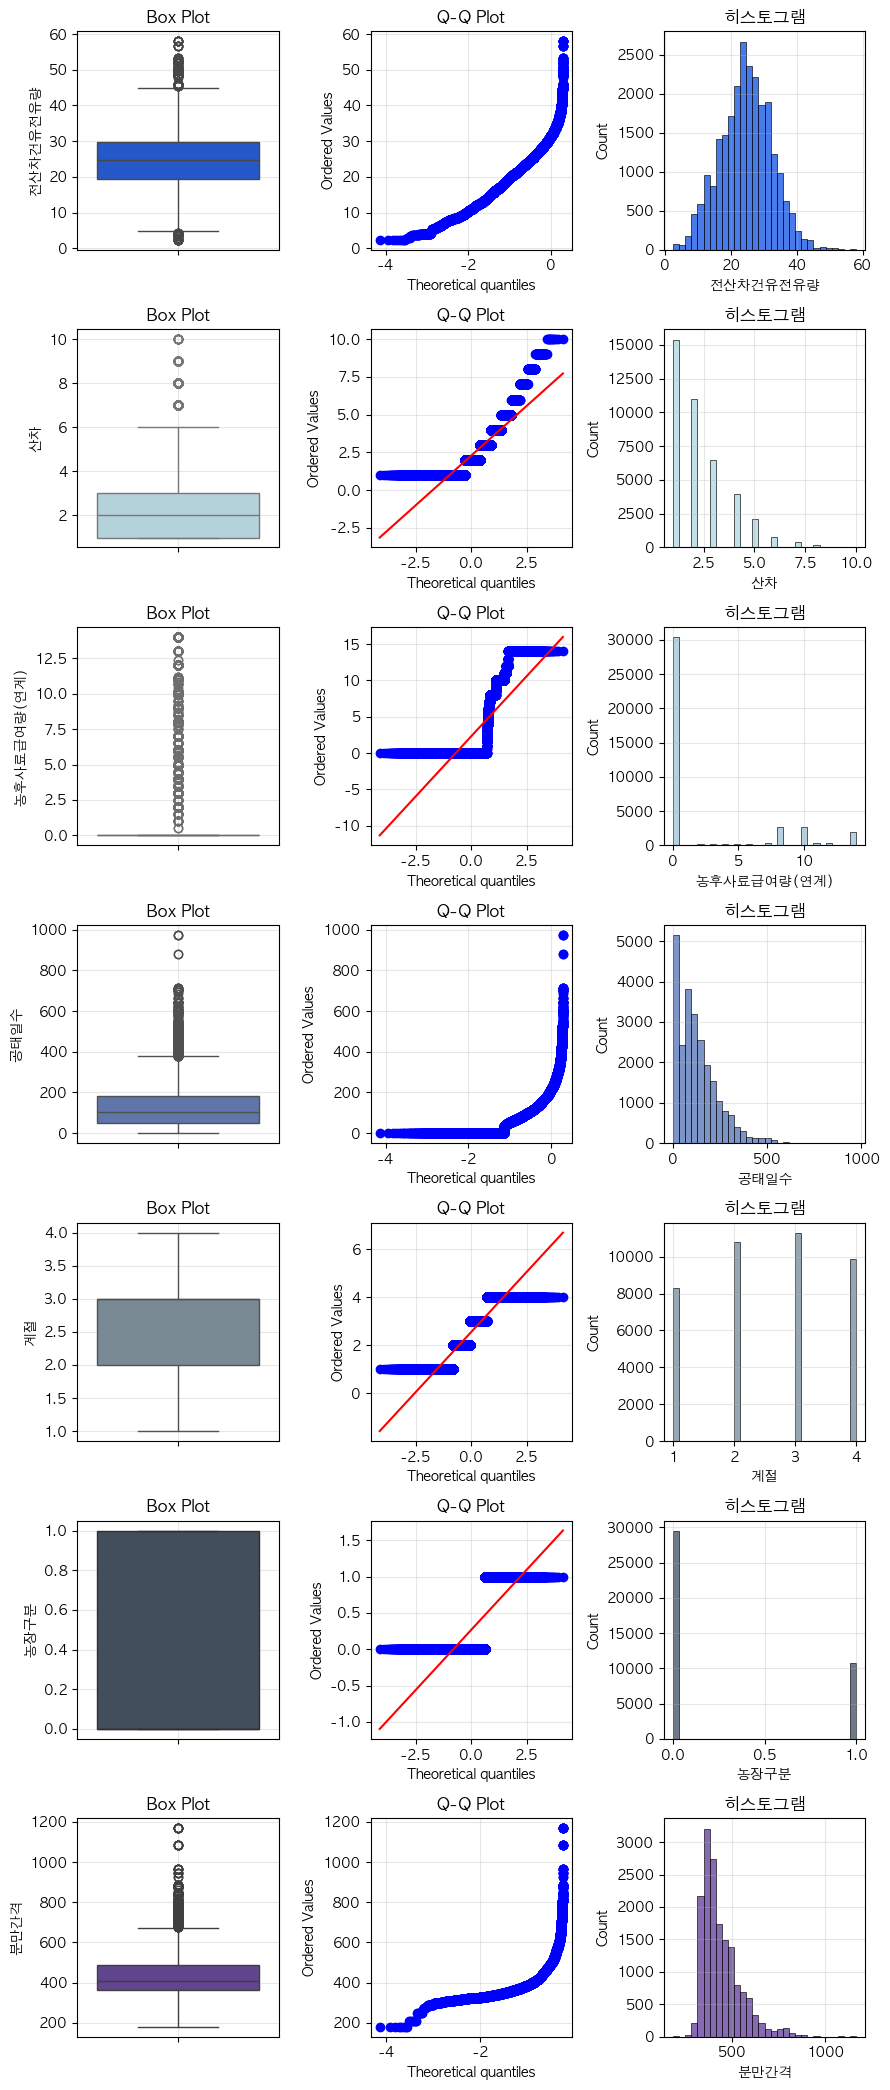

In [47]:
features = ['전산차건유전유량', '산차', '농후사료급여량(연계)', '공태일수', '계절', '농장구분', '분만간격']

colors = ["#0A4EE4", "#AED6E0", "#9BC4D5", "#5271B7", "#758A98", "#3E4E5F", "#5D3A99", "#9370DB"]



plot_features(dropped, features, colors, bins=30)

In [48]:
dropped['무지고형분'] = dropped['무지고형분'].apply(lambda x: 0 if 8.2 <= x <= 9.0 else 1)
dropped['우유내요소태질소'] = dropped['우유내요소태질소'].apply(lambda x: 0 if 12 <= x <= 18 else 1)

## 이름 고치기

In [49]:
dropped.rename(columns={
    '우유내요소태질소': 'MUN',
}, inplace=True)

In [50]:
dropped.isnull().sum()

농장아이디              0
개체번호               0
검정일자               0
누적착유일(연계)          0
무지고형분              0
MUN                0
305일유량          8498
305일무지고형분       8498
전산차비유지속성       22646
전산차건유전유량       15543
산차                 0
농후사료비(연계)          0
농후사료급여량(연계)        0
공태일수           15726
비유단계               0
계절                 0
농장구분               0
정액코드분류         18398
가격                 0
가격미달               0
가격구분               0
분만간격           24068
분만월령               0
dtype: int64

In [51]:
# 로그 변환
dropped['공태일수_log'] = np.log1p(dropped['공태일수'])

# 사인 변환
dropped['계절_sin'] = np.sin(dropped['계절'] * (2 * np.pi) / dropped['계절'].nunique())
dropped['비유단계_sin'] = np.sin(dropped['비유단계'] * (2 * np.pi) / dropped['비유단계'].nunique())

In [52]:
dropped.to_csv(DATA_DIR / "interim" / "milk.csv", index=False, encoding="utf-8")

In [52]:
# dropped_milk = milk.dropna(subset=sum(series_lst, []), how='all')

In [55]:
# dropped_milk['PF비'] = dropped_milk['유단백'].div(dropped_milk['유지방율'])

In [56]:
# '비유초기평균MNU' -> '비유초기평균MUN'
# dropped_milk.rename(columns={
#     '우유내요소태질소': 'MUN',
#     '비유초기평균MNU': '비유초기평균MUN'
# }, inplace=True)


In [57]:
# dropped_milk.to_csv("../../data/interim/code.csv", index=False, encoding="utf-8")